# GHZ and W States
## Basado en el siguiente tutorial:
https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep8_Noise_and_Error_Mitigation.ipynb

In [1]:
from numpy import pi

In [2]:
# Importing standard Qiskit libraries

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import *
from qiskit_aer import AerSimulator

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
backend_simulator = AerSimulator()
backend_device = FakeBogotaV2()

In [5]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

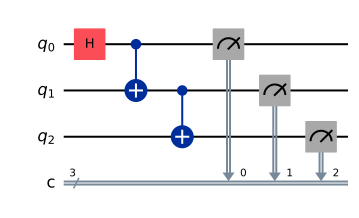

In [6]:
circuit.draw(output='mpl')

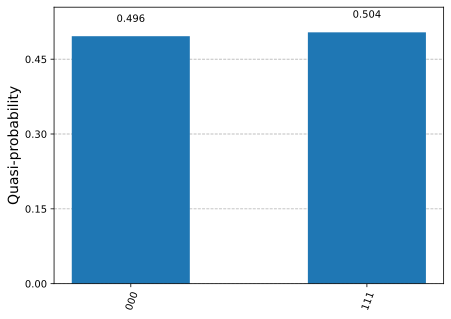

In [7]:
shots = 8192
sim_result = backend_simulator.run((circuit), shots=shots).result()
sim_counts = sim_result.get_counts(circuit)

plot_distribution(sim_counts)

In [8]:
transpiled_circuit = transpile(circuit, backend_device)

In [9]:
sampler2run = Sampler(mode=backend_device)

In [10]:
# Define the number of shots for the execution. 
shotno=1024

# Run the circuit on a real quantum computer. NB! This may take a while.
job = sampler2run.run([transpiled_circuit], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> Job ID: {job.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job.status()}")

>>> Job ID: a9d076f7-bc9f-4dc2-8a0d-2ebc6c2b739e
>>> Job Status: JobStatus.RUNNING


In [11]:
device_result = job.result()

# Get results for the first (and only) PUB
pub_result = device_result[0]

# Get count measurement results
device_counts = pub_result.data.c.get_counts()

print(
    f"Counts for the 'meas' output register: {device_counts}"
)

Counts for the 'meas' output register: {'010': 15, '000': 466, '111': 442, '110': 25, '011': 24, '100': 14, '001': 18, '101': 20}


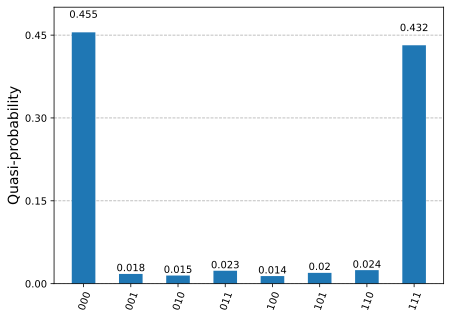

In [12]:
# Probabilidades de medición de cada salida, dada la ejecución real realizada.
plot_distribution(device_counts)

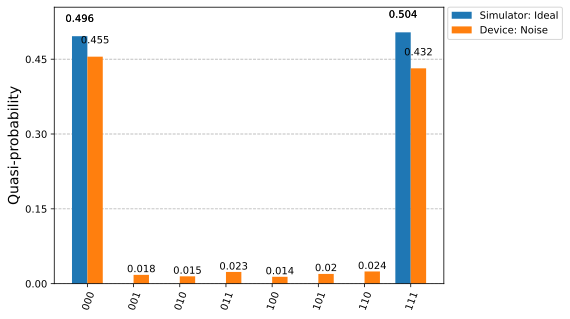

In [13]:
plot_distribution([sim_counts, device_counts], 
               legend=['Simulator: Ideal', 'Device: Noise'])

# Running error mitigation on a second circuit

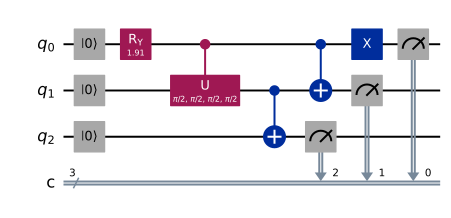

In [14]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit2 = QuantumCircuit(qreg_q, creg_c)

circuit2.reset(qreg_q[0])
circuit2.reset(qreg_q[1])
circuit2.reset(qreg_q[2])
circuit2.ry(1.9106332362490184, qreg_q[0])
circuit2.cu(pi / 2, pi / 2, pi / 2, pi / 2, qreg_q[0], qreg_q[1])
circuit2.cx(qreg_q[1], qreg_q[2])
circuit2.cx(qreg_q[0], qreg_q[1])
circuit2.x(qreg_q[0])
circuit2.measure(qreg_q[0], creg_c[0])
circuit2.measure(qreg_q[1], creg_c[1])
circuit2.measure(qreg_q[2], creg_c[2])

circuit2.draw(output='mpl')

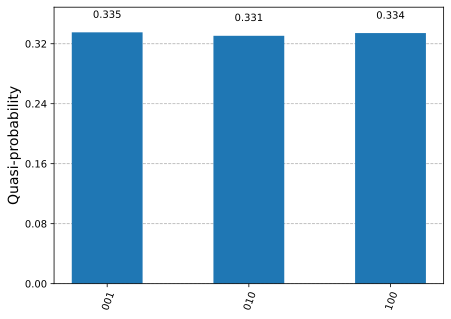

In [15]:
shots = 8192
sim_result2 = backend_simulator.run((circuit2), shots=shots).result()
sim_counts2 = sim_result2.get_counts(circuit2)

# Simulating the circuit and plotting the corresponding histogram:
plot_distribution(sim_counts2)

In [ ]:
transpiled_circuit2 = transpile(circuit2, backend_device)
# transpiled_circuit.draw('mpl', style="iqp")
# plt.show()

In [17]:
# Define the number of shots for the execution. 
shotno=1024

# Run the circuit on a real quantum computer. NB! This may take a while.
job2 = sampler2run.run([transpiled_circuit2], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> Job ID: {job2.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job2.status()}")

>>> Job ID: fbd52469-5a75-48f8-b2e2-e1244c8493c8
>>> Job Status: JobStatus.RUNNING


Counts for the 'meas' output register: {'100': 305, '001': 341, '010': 289, '000': 40, '011': 16, '101': 18, '111': 3, '110': 12}


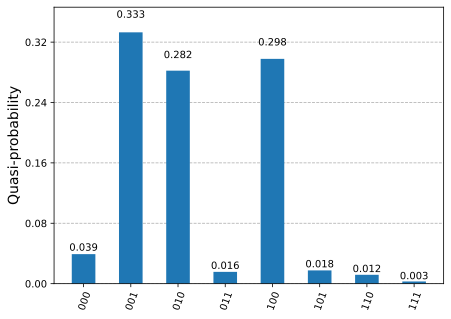

In [19]:
device_result2 = job2.result()

# Get results for the first (and only) PUB
pub_result2 = device_result2[0]

# Get count measurement results
device_counts2 = pub_result2.data.c.get_counts()

print(
    f"Counts for the 'meas' output register: {device_counts2}")

plot_distribution(device_counts2)

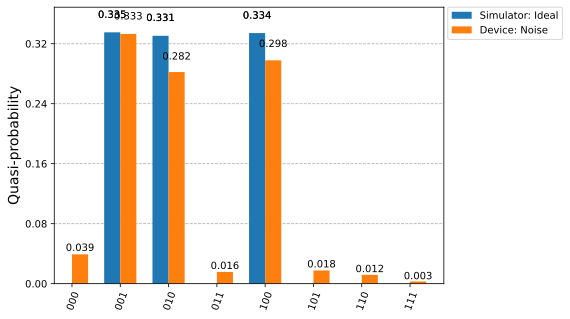

In [20]:
plot_distribution([sim_counts2, device_counts2], 
               legend=['Simulator: Ideal', 'Device: Noise'])